In [1]:
import pandas as pd
import configparser
import matplotlib.pyplot as plt
%matplotlib inline

from Wrapper import *
from Influx_Dataframe_Client import Influx_Dataframe_Client

# Data Sources

## csv files

{'adj_r2': 0.554923420378242,
 'mse': 164.19393605327468,
 'r2': 0.5646922318153362,
 'rmse': 12.813818168417823}

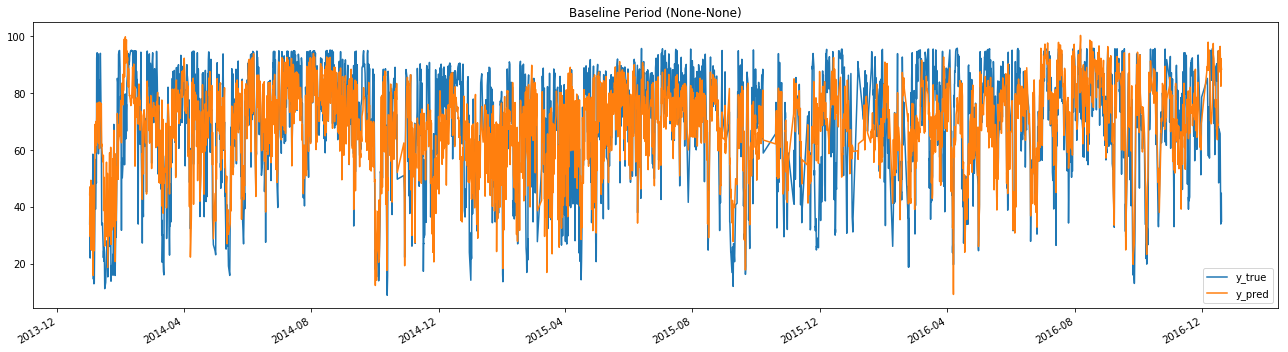

In [2]:
def func(X, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    model = LinearRegression()
    model.fit(X, y)
    return model.predict(X)

main_obj = Wrapper()
imported_data = main_obj.import_data(folder_name='../../../../../Desktop/LBNL/Data/', head_row=[5,5,0])
cleaned_data = main_obj.clean_data(imported_data, high_bound=9998,
                                rename_col=['OAT', 'RelHum_Avg', 'CHW_Elec', 'Elec', 'Gas', 'HW_Heat'])
preprocessed_data = main_obj.preprocess_data(cleaned_data, WEEK=True, TOD=True, var_to_expand=['TOD','WEEK'])
main_obj.model(preprocessed_data, output_col='HW_Heat', alphas=np.logspace(-4,1,5), figsize=(18,5),
#                 time_period=["2014-01","2014-12", "2015-01","2015-12", "2016-01","2016-12"],
                custom_model_func=func)

## InfluxDB

In [3]:
# database = 'pyTestDB'
# measurement = 'SkySpark_Power'
# tags_list = ['Building_Number']
# values_list = ['30_1']
# client = Influx_Dataframe_Client('./cloud_server.ini')

# query1 = client.specific_query(database, measurement, tags=tags_list, values=values_list,
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')
# query2 = client.specific_query(database, measurement='Outdoor_Air_Temperature',
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')

In [4]:
# df = query1.copy()
# df = df.join(query2, how='outer')
# df.plot()

In [5]:
# main_obj = Main()
# cleaned_data = main_obj.clean_data(df, rename_col=['Power', 'OAT'])
# preprocessed_data = main_obj.preprocess_data(cleaned_data, input_col_degree=['OAT'], degree=[2], 
#                                           MONTH=True, WEEK=True, var_to_expand=['MONTH', 'WEEK'])

# preprocessed_data.to_csv('preprocessed_data.csv')

# main_obj.model(preprocessed_data, output_col='Power', time_period=["2017-08", "2018-07"], alphas=np.logspace(-4,1,5))